# 05 VISHMO - Visualization of horizontal motion fields with R

In [1]:
Sys.setenv(GDAL_DATA='/opt/anaconda/share/gdal')
Sys.setenv(PATH='/opt/anaconda/bin')

In [2]:
source('https://bitbucket.org/AndreStumpf/vishmo/raw/a54bd6f55450fd5bbfcd51843578b811686cc1b1/plotField.R')
source('https://bitbucket.org/AndreStumpf/vishmo/raw/a54bd6f55450fd5bbfcd51843578b811686cc1b1/getCrossSection.R')

In [3]:
library('sp')

In [4]:
library('rgdal')

rgdal: version: 1.2-15, (SVN revision 691)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.0, released 2016/04/25
 Path to GDAL shared files: /opt/anaconda/share/gdal
 GDAL binary built with GEOS: FALSE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-5 


In [5]:
user <- 'fbrito'
api <- 'AKCp2VokXW9QGM3RC3WUevapB1k1vSLgyuj5JvEidwTv1jQjTN21UQZuqS9JbP9jywr7o7DUC'

In [6]:
centerx <- 64.794
centery <- 26.5455

extent = 0.1 

ulx <- centerx - extent
uly <- centery + extent
lrx <- centerx + extent
lry <- centery - extent

In [7]:
url_EW <- paste('/vsicurl/https://', user, ':', api, '@store.terradue.com/api/fbrito/vishmo/BalochistanEW.tif', sep = '')
url_NS <- paste('/vsicurl/https://', user, ':', api, '@store.terradue.com/api/fbrito/vishmo/BalochistanNS.tif', sep = '')

EW <- ('subset_BalochistanEW.tif')
NS <- ('subset_BalochistanNS.tif')

cmd <- paste('gdal_translate -projwin', ulx, uly, lrx, lry, '-projwin_srs EPSG:4326', url_EW, 'subset_BalochistanEW.tif', sep = ' ')
system(cmd)
cmd <- paste('gdal_translate -projwin', ulx, uly, lrx, lry, '-projwin_srs EPSG:4326', url_NS, 'subset_BalochistanNS.tif', sep = ' ')
system(cmd)

Loading required package: lattice
Loading required package: latticeExtra
Loading required package: RColorBrewer


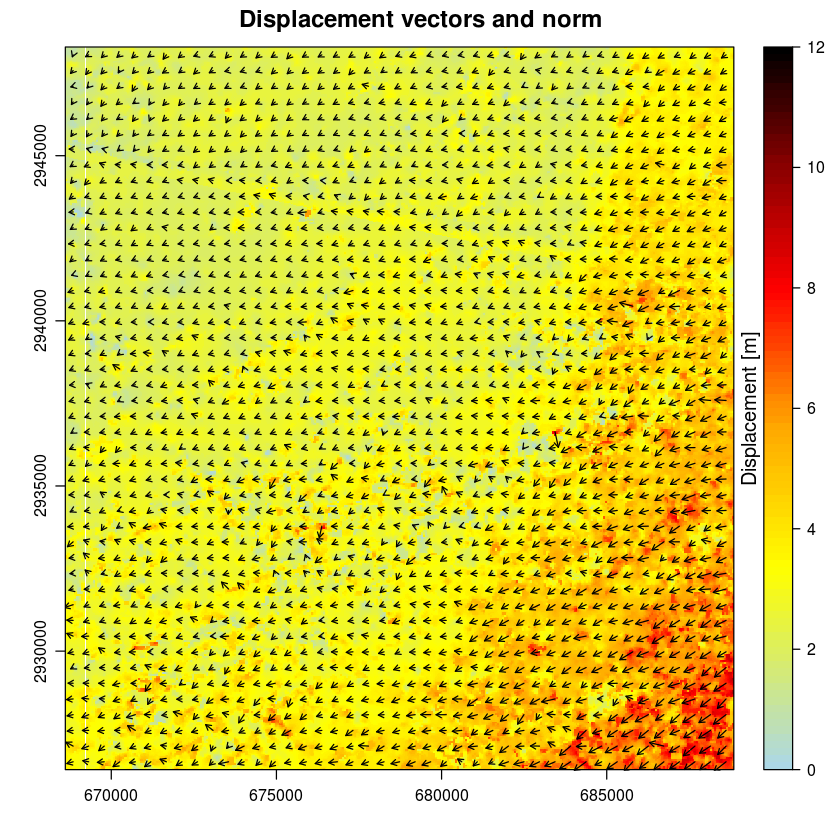

In [8]:
plotField(EW, NS, type="magnitude",max.displacement = 12,title='Displacement vectors and norm', col.bias=0.8)
